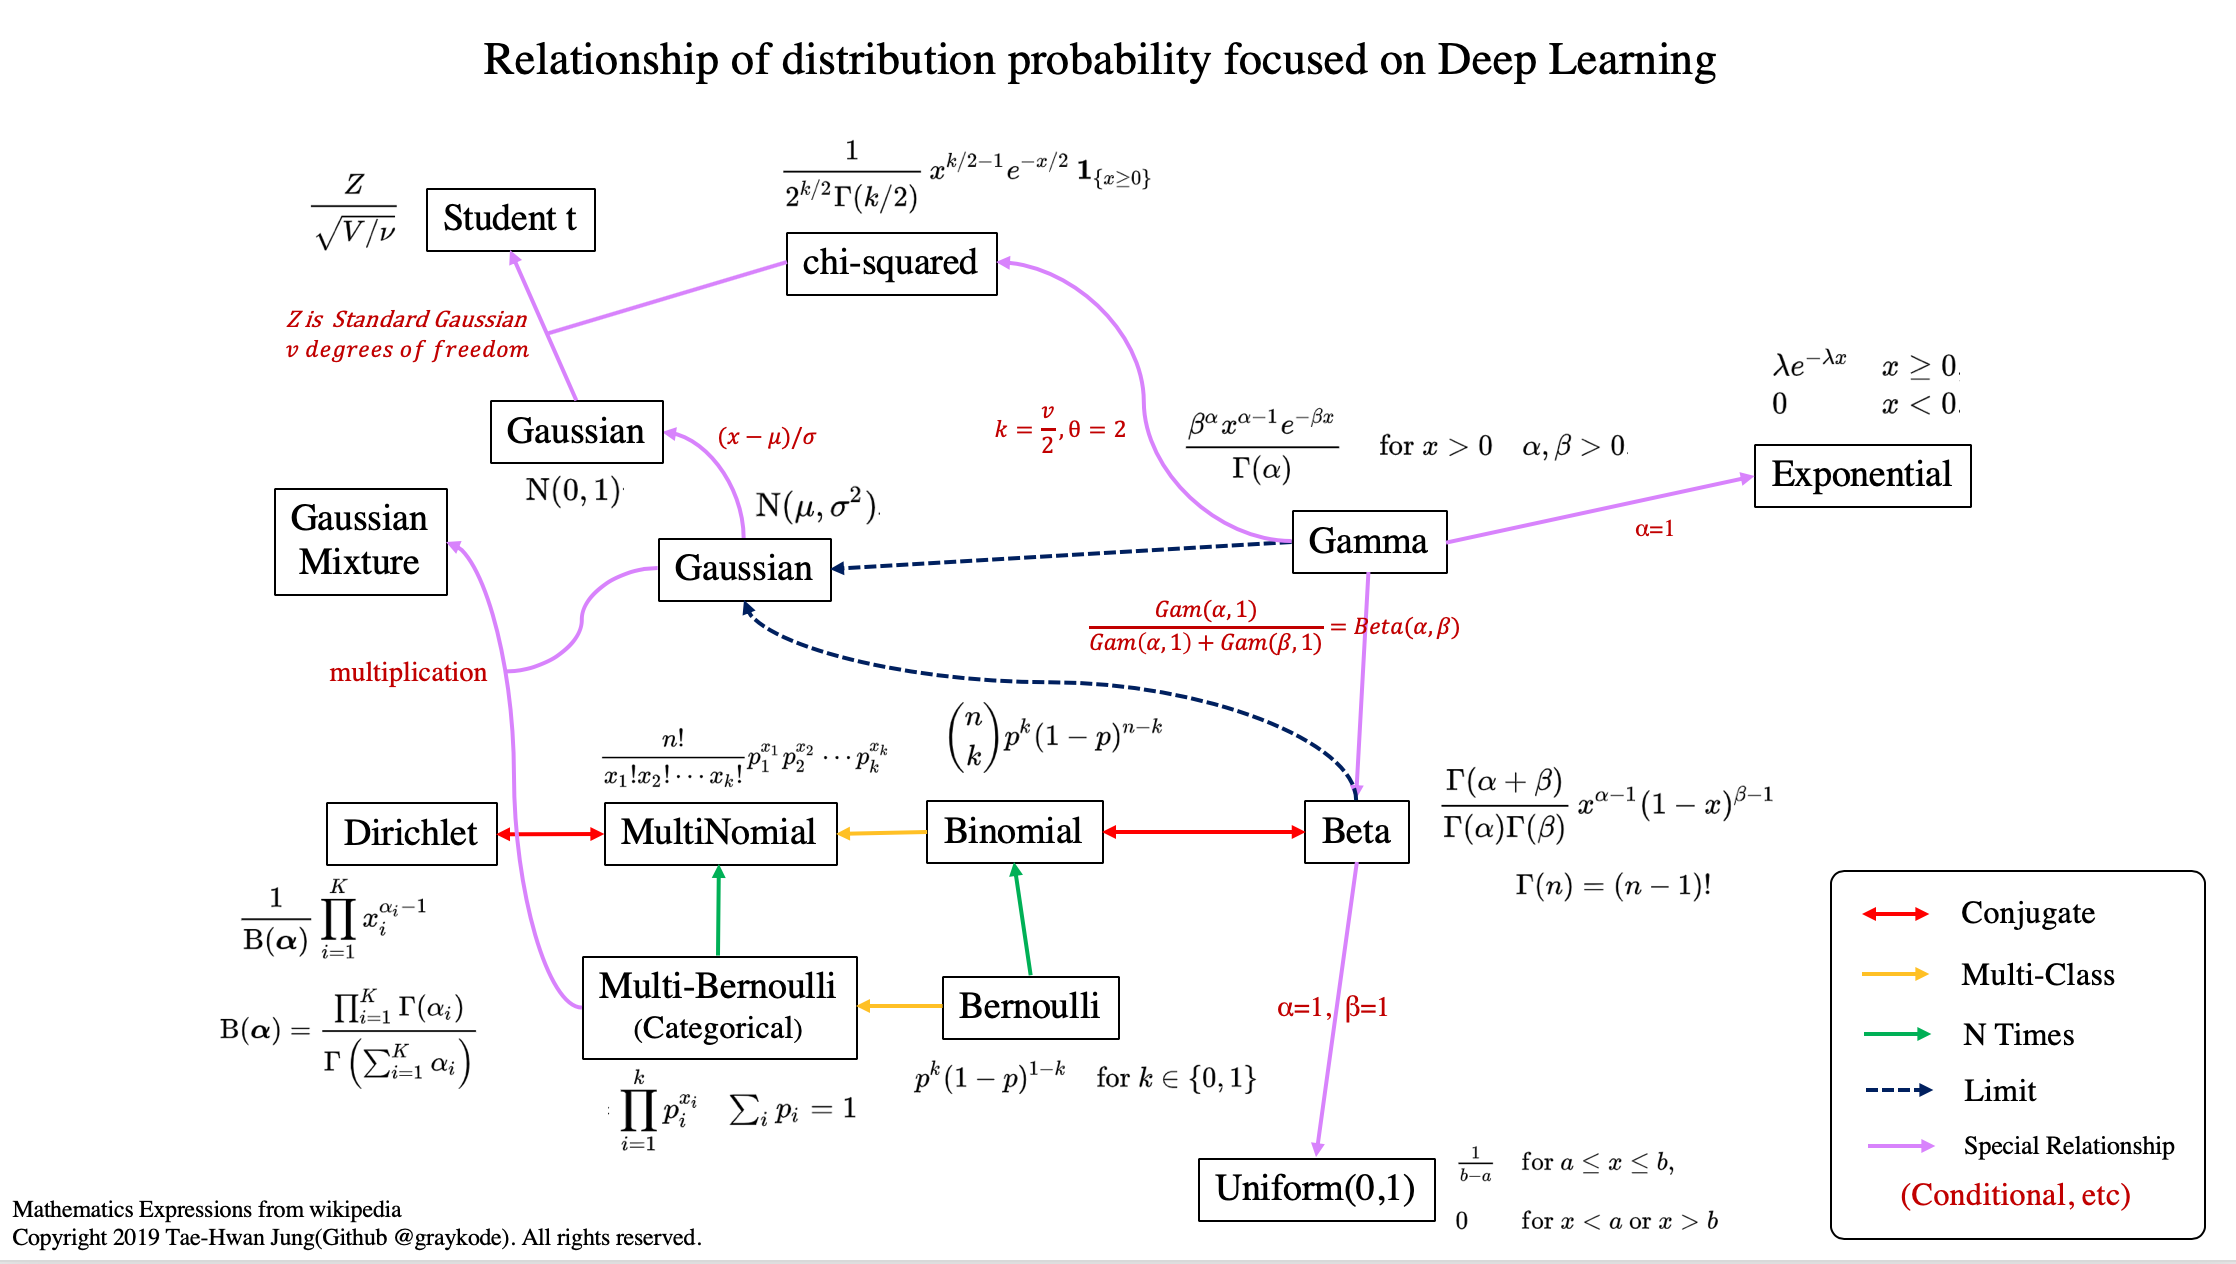

In [2]:
import random
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# 1. Uniform Distribution

In [3]:
from scipy.stats import uniform
mean, var, skew, kurt = uniform.stats(moments='mvsk')
print(mean, var, skew, kurt)

0.5 0.08333333333333333 0.0 -1.2


In [4]:
print(uniform.stats(moments='k'))
print(uniform.moment(4, loc=0, scale=1)) # Non-central moment, different from Kurtosis.

-1.2
0.2


为什么Kurtosis=-1.2?

$$\kappa = {\int\limits_{x=0}^1 (x - \mu)^4 dx \over \left( \int\limits_{x=0}^1 (x - \mu)^2 dx \right)^2} - 3= {\int\limits_{x=0}^1 (x-1/2)^4 dx \over \left(\int\limits_{x=0}^1 (x-1/2)^2 dx \right)^2} - 3= {9 \over 5} - 3 = -1.2$$

In [5]:
rv_uniform = uniform(10,40)
mean, var, skew, kurt = rv_uniform.stats(moments='mvsk')
print(mean, var, skew, kurt)

30.0 133.33333333333331 0.0 -1.2


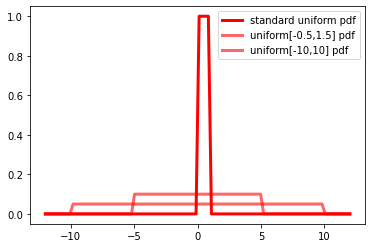

In [6]:
x = np.linspace(-12,12,100)
plt.plot(x, uniform.pdf(x),'r-', lw=3, alpha=1.0, label='standard uniform pdf')
plt.plot(x, uniform.pdf(x,-5,10),'r-', lw=3, alpha=0.6, label='uniform[-0.5,1.5] pdf')
plt.plot(x, uniform.pdf(x,-10,20),'r-', lw=3, alpha=0.6, label='uniform[-10,10] pdf')
plt.legend()

Matplotlib allows you to regulate the transparency of a graph plot using the alpha attribute. By default, alpha=1. If you would like to form the graph plot more transparent, then you’ll make alpha but 1, such as 0.5 or 0.25. If you would like to form the graph plot less transparent, then you’ll make alpha greater than 1.

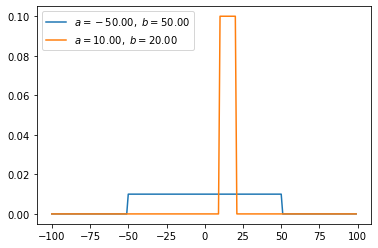

In [7]:
def my_uniform_pdf(x, a, b):

    y = [1 / (b - a) if a <= val and val <= b else 0 for val in x]

    return x, y

x = np.arange(-100, 100) # define range of x
for ls in [(-50, 50), (10, 20)]:
    a, b = ls[0], ls[1]
    x, y = my_uniform_pdf(x, a, b)
    plt.plot(x, y, label=r'$a=%.2f,\ b=%.2f$' % (a, b))

plt.legend()
#plt.savefig('graph/uniform.png')
plt.show()

In [8]:
# random numbers from uniform distribution
n     = 10000
start = 10
width = 20
samples_uniform = uniform.rvs(size=n, loc = start, scale=width)

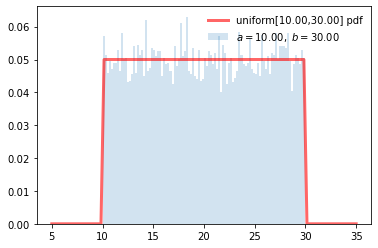

In [9]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(start-5,start+width+5,100)
ax.hist(samples_uniform, bins=100,density=True, histtype='stepfilled', alpha=0.2, label=r'$a=%.2f,\ b=%.2f$' % (start, start+width))
ax.plot(x, uniform.pdf(x,start,width),'r-', lw=3, alpha=0.6, label='uniform[%.2f,%.2f] pdf' % (start, start+width))
ax.legend(loc='best', frameon=False)
plt.show()

Check accuracy of cdf and ppf:

In [10]:
vals = uniform.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))

True

No handles with labels found to put in legend.


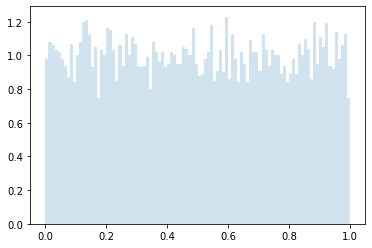

In [11]:
r = uniform.rvs(size=10000)
fig, ax = plt.subplots(1, 1)
ax.hist(r, bins=100,density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [12]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

In [13]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

C:\Users\chenxy\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

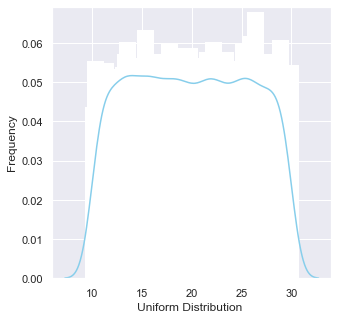

In [14]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

但是，上面这个结果看上去不太对劲啊？